In [1]:
import torch.nn as nn

In [2]:
import torch
import torch.nn.functional as F
from torchvision import datasets, transforms
from tqdm.notebook import tqdm
import numpy as np

In [3]:
#download MNIST
mnist_train = datasets.MNIST(root="./datasets", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root="./datasets", train=False, transform=transforms.ToTensor(), download=True)
#create minibatches 
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=100, shuffle=False)

In [8]:
epoch=[1,4,6,9,11,15,18,20,22,24,27,29,31]
#training set
acc=[]
for k in epoch:
  w1=torch.randn(784,5)/np.sqrt(784)
  w1.requires_grad_()
  b1=torch.zeros(5, requires_grad=True)
  w2=torch.randn(5,10)/np.sqrt(5)
  w2.requires_grad_()
  b2=torch.zeros(10,requires_grad=True) 
  optimizer = torch.optim.SGD([w1,b1,w2,b2], lr=0.1)
  for t in range(k):
    for images, labels in tqdm(train_loader):
        x = images.view(-1, 28*28)
        optimizer.zero_grad()
        z=torch.zeros(100,10)
        y=torch.matmul(x,w1) + b1
        y_relu = F.relu(y)
        z=torch.matmul(y_relu,w2)
        z1=z+b2
        cross_entropy = F.cross_entropy(z1, labels)
        cross_entropy.backward(retain_graph=True)
        optimizer.step()
  #test set
  correct = 0
  total = len(mnist_test)
  with torch.no_grad():
    for images, labels in tqdm(test_loader):
        x = images.view(-1, 28*28)
        zk=torch.zeros(100,10)
        y=torch.matmul(x,w1) + b1
        y_relu = F.relu(y)
        zk=torch.matmul(y_relu,w2)
        z1=zk+b2
        predictions = torch.argmax(z1, dim=1)
        correct += torch.sum((predictions == labels).float())
  acc.append(correct/total)
  print("For",k,"epoch accuracy =",correct/total)


For 1 epoch accuracy = tensor(0.8284)



For 4 epoch accuracy = tensor(0.8775)



For 6 epoch accuracy = tensor(0.8902)



For 9 epoch accuracy = tensor(0.8952)



For 11 epoch accuracy = tensor(0.8826)



For 15 epoch accuracy = tensor(0.8909)



For 18 epoch accuracy = tensor(0.8738)



For 20 epoch accuracy = tensor(0.8975)



For 22 epoch accuracy = tensor(0.8970)



For 24 epoch accuracy = tensor(0.8979)



For 27 epoch accuracy = tensor(0.8996)



For 29 epoch accuracy = tensor(0.8992)



For 31 epoch accuracy = tensor(0.8836)


In [11]:
epoch=np.array(epoch)
acc=np.array(acc)
print(acc)

[0.8284 0.8775 0.8902 0.8952 0.8826 0.8909 0.8738 0.8975 0.897  0.8979
 0.8996 0.8992 0.8836]


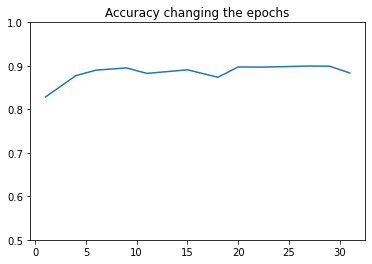

In [13]:
from matplotlib import pyplot
pyplot.plot(epoch,acc)
pyplot.ylim(0.5,1)
pyplot.title("Accuracy changing the epochs")
pyplot.show()